## 使用elephant读取nwb文件

In [1]:
# 1. 数据文件列表
import os
root = "D:/datasets/SpikeData/nwb_sample/"
fls = os.listdir(root)
fls = [root+f for f in fls]
fls[0], len(fls)

('D:/datasets/SpikeData/nwb_sample/sub-210862_ses-20130626_behavior+ecephys+ogen.nwb',
 20)

In [15]:
nwb_file = fls[0]
nwb_file

'D:/datasets/SpikeData/nwb_sample/sub-210862_ses-20130626_behavior+ecephys+ogen.nwb'

In [16]:
import neo
io = neo.io.NWBIO(nwb_file)
io

In [17]:
blk = io.read_all_blocks()

D:\User\mrrai\.conda\envs\Elephant\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.1.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


AttributeError: 'BehavioralEvents' object has no attribute 'comments'

In [14]:
blk

In [17]:
blk.container_children

(Segment with 3 events, 267 spiketrains
 name: 'Segment 0'
 description: 'Segment containing data from t_start to t_stop'
 # analogsignals (N=0),)

In [19]:
type(blk.segments)

list

In [20]:
blk.segments[0]

Segment with 3 events, 267 spiketrains
name: 'Segment 0'
description: 'Segment containing data from t_start to t_stop'
# analogsignals (N=0)

In [21]:
blk_seg0 = blk.segments[0]
type(blk_seg0)

neo.core.segment.Segment

In [28]:
blk_seg0.spiketrains

In [33]:
sp = blk_seg0.spiketrains
sp[0]

SpikeTrain containing 2 spikes; units s; datatype float64 
name: 'ch2#0'
description: 'SpikeTrain channel_id: 2, unit_id: 0'
annotations: {'id': 'Unit 2000',
  'channel_id': 2,
  'unit_id': 0,
  'unit_tag': 'unclassified'}
time: 0.021733333333333334 s to 908.2021333333333 s

In [49]:
sp_list = list(sp)
sp0 = sp_list[8]
len(sp_list), sp0.t_start, sp0.t_stop, len(sp0.times)

(267, 'ch8#0', array(0.02173333) * s, array(908.20213333) * s, 1)

In [51]:
for sp in sp_list:
    print(sp.name, ": ", len(sp.times))

ch2#0 :  2
ch4#0 :  242
ch4#1 :  317
ch4#2 :  257
ch5#0 :  30
ch6#0 :  286
ch6#1 :  918
ch7#0 :  13
ch8#0 :  1
ch11#0 :  2
ch16#0 :  6
ch17#0 :  687
ch17#1 :  276
ch18#0 :  48
ch25#0 :  2
ch30#0 :  9
ch32#0 :  795
ch33#0 :  24
ch34#0 :  7
ch35#0 :  806
ch35#1 :  1818
ch36#0 :  265
ch36#1 :  242
ch37#0 :  5
ch40#0 :  1
ch42#0 :  6
ch45#0 :  296
ch45#1 :  1200
ch47#0 :  1
ch49#0 :  272
ch51#0 :  175
ch51#1 :  151
ch53#0 :  3185
ch53#1 :  2406
ch53#2 :  1507
ch54#0 :  3
ch55#0 :  3038
ch55#1 :  2426
ch55#2 :  1139
ch56#0 :  17
ch57#0 :  490
ch57#1 :  303
ch57#2 :  315
ch58#0 :  7
ch59#0 :  45
ch60#0 :  14
ch61#0 :  645
ch61#1 :  823
ch63#0 :  1
ch64#0 :  14
ch65#0 :  640
ch65#1 :  883
ch65#2 :  537
ch66#0 :  460
ch68#0 :  10
ch69#0 :  634
ch69#1 :  3153
ch70#0 :  2
ch72#0 :  51
ch73#0 :  896
ch73#1 :  3576
ch74#0 :  1131
ch74#1 :  2592
ch74#2 :  220
ch75#0 :  72
ch76#0 :  118
ch77#0 :  4
ch78#0 :  252
ch80#0 :  865
ch80#1 :  1972
ch81#0 :  28
ch82#0 :  229
ch83#0 :  30635
ch85#0 :  5
ch86

In [1]:
from elephant import statistics as st

In [42]:
help(st.fanofactor)

Help on function fanofactor in module elephant.statistics:

fanofactor(spiketrains, warn_tolerance=array(0.1) * ms)
    Evaluates the empirical Fano factor F of the spike counts of
    a list of `neo.SpikeTrain` objects.
    
    Given the vector v containing the observed spike counts (one per
    spike train) in the time window [t0, t1], F is defined as:
    
    .. math::
        F := \frac{var(v)}{mean(v)}
    
    The Fano factor is typically computed for spike trains representing the
    activity of the same neuron over different trials. The higher F, the
    larger the cross-trial non-stationarity. In theory for a time-stationary
    Poisson process, F=1.
    
    Parameters
    ----------
    spiketrains : list
        List of `neo.SpikeTrain` or `pq.Quantity` or `np.ndarray` or list of
        spike times for which to compute the Fano factor of spike counts.
    warn_tolerance : pq.Quantity
        In case of a list of input neo.SpikeTrains, if their durations vary by
        m

In [17]:
import neo
import quantities as pq
from elephant import statistics
spiketrain = neo.SpikeTrain([0.1, 1.2, 1.4, 1.52, 8.5, 8.7, 9.1], t_stop=10, units='s')
rate = statistics.instantaneous_rate(spiketrain, sampling_period=10 * pq.ms, kernel='auto')
rate

AnalogSignal with 1 channels of length 1000; units Hz; datatype float64 
annotations: {'t_stop': array(10.) * s,
  'kernel': {'type': 'GaussianKernel',
   'sigma': '0.6393446398835686 s',
   'invert': False}}
sampling rate: 0.1 1/ms
time: 0.0 s to 10.0 s

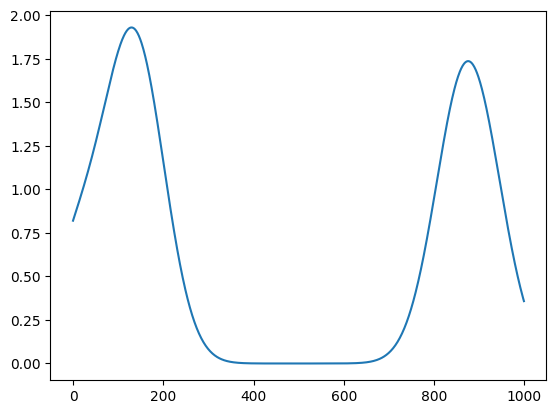

In [18]:
import matplotlib.pyplot as plt
plt.plot(rate.magnitude.flatten())
plt.show()

In [23]:
spiketrains = [
    neo.SpikeTrain([0.3, 4.5, 6.7, 9.3], t_stop=10, units='s'),
    neo.SpikeTrain([0.7, 4.3, 8.2], t_stop=10, units='s'),
    neo.SpikeTrain([0.1, 2.3, 3.5, 6.2], t_stop=10, units='s')
]
hist = statistics.time_histogram(spiketrains, bin_size=1 * pq.s)
hist.magnitude.flatten()

array([3, 0, 1, 1, 2, 0, 2, 0, 1, 1], dtype=int32)

<BarContainer object of 10 artists>

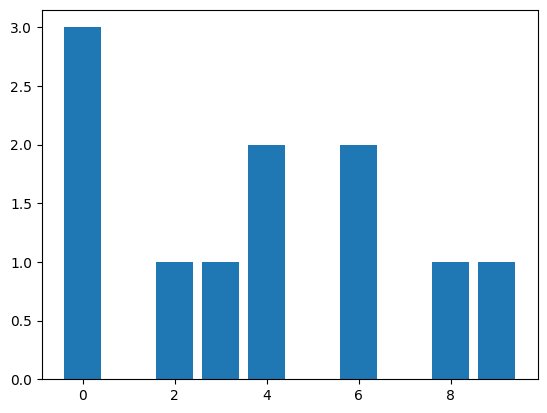

In [25]:
b = hist.magnitude.flatten()
x = list(range(b.shape[0]))
plt.bar(x, b)

In [30]:
import numpy as np
sp = np.array([0.2, 1.3, 2.1, 2.3, 2.45, 2.53, 4.7, 6.3, 9.4])
statistics.optimal_kernel_bandwidth(sp)

{'y': array([0.11682064, 0.11970782, 0.12254538, 0.12532678, 0.12804555,
        0.13069529, 0.13326972, 0.13576272, 0.13816832, 0.14048078,
        0.14269456, 0.14480442, 0.14680536, 0.14869272, 0.15046216,
        0.1521097 , 0.15363173, 0.15502502, 0.15628677, 0.15741458,
        0.15840649, 0.15926099, 0.15997699, 0.16055388, 0.16099148,
        0.16129005, 0.16145033, 0.16147346, 0.16136103, 0.16111504,
        0.1607379 , 0.16023239, 0.15960167, 0.15884925, 0.15797896,
        0.15699493, 0.15590159, 0.15470359, 0.15340583, 0.15201341,
        0.15053157, 0.14896573, 0.14732139, 0.14560418, 0.14381973,
        0.14197376, 0.14007194, 0.13811995, 0.13612342, 0.13408791,
        0.13201887, 0.12992165, 0.12780148, 0.12566341, 0.12351234,
        0.121353  , 0.1191899 , 0.11702736, 0.11486949, 0.11272017,
        0.11058305, 0.10846155, 0.10635885, 0.10427791, 0.10222143,
        0.10019189, 0.09819152, 0.09622233, 0.09428611, 0.0923844 ,
        0.09051857, 0.08868973, 0.08689883,

In [39]:
statistics.lv(sp)

0.2800087199554663

### Complexity

In [1]:
import neo
import quantities as pq
from elephant.statistics import Complexity

In [27]:
sampling_rate = 1/pq.ms
st1 = neo.SpikeTrain(
    [0.7, 1.3, 1.5, 3, 3.3, 6.7, 9.4] * pq.ms, 
    t_stop=10.0 * pq.ms)
st2 = neo.SpikeTrain(
    [0.4, 2.2, 2.5, 2.8, 3.1, 7.9, 8.1, 9.7] * pq.ms, 
    t_stop=10.0 * pq.ms)
sts = [st1, st2]
sts

[SpikeTrain containing 7 spikes; units ms; datatype float64 
 time: 0.0 ms to 10.0 ms,
 SpikeTrain containing 8 spikes; units ms; datatype float64 
 time: 0.0 ms to 10.0 ms]

In [28]:
cpx = Complexity(sts, sampling_rate=sampling_rate, spread=1)

In [29]:
cpx.complexity_histogram

array([2, 0, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
print(cpx.time_histogram.flatten())

[6 6 6 6 0 0 5 5 5 5] dimensionless
